In [4]:
import pandas as pd
import numpy as np
import os , shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import zipfile
%matplotlib inline
plt.style.use('ggplot')

Renaming The Files

In [8]:
path_ys='Brain_Tumor_Images/yes/'
cnt=1
for fl_nm in os.listdir(path_ys):
    source=path_ys+fl_nm
    dest=path_ys+"Y_"+str(cnt)+".jpg"
    os.rename(source,dest)
    cnt+=1

In [9]:
path_no='Brain_Tumor_Images/no/'
cnt=1
for fl_nm in os.listdir(path_no):
    source=path_no+fl_nm
    dest=path_no+"N_"+str(cnt)+".jpg"
    os.rename(source,dest)
    cnt+=1

In [10]:
cnt_ys=len(os.listdir('Brain_Tumor_Images/yes/'))
cnt_no=len(os.listdir('Brain_Tumor_Images/no/'))

Text(0.5, 1.0, 'Number of brain Tumor Image')

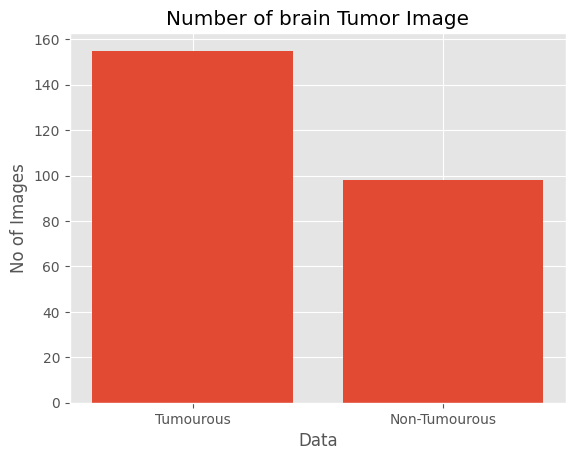

In [14]:
type=["Tumourous","Non-Tumourous"]
value=[cnt_ys,cnt_no]
plt.bar(type,value)
plt.xlabel('Data')
plt.ylabel('No of Images')
plt.title('Number of brain Tumor Image')

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [18]:
def augment_data(file_dir, n_sample, saving_dir):
    datagen=ImageDataGenerator(rotation_range=10,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.1,
                                brightness_range=(0.3,1.0),
                                horizontal_flip=True,
                                vertical_flip=True,
                                fill_mode='nearest')
    for filename in os.listdir(file_dir):
        img=cv2.imread(file_dir+'/'+ filename)
        img=img.reshape((1,)+img.shape)
        save_prefix='aug_'+filename[:-4]
        i=0
        for batch in datagen.flow(x=img,batch_size=1,save_to_dir=saving_dir,save_prefix=save_prefix,save_format='jpg'):
            i+=1
            if i>n_sample:
                break
            


In [20]:
augment_data('Brain_Tumor_Images/yes',6,'Augmented_Data/yes')
augment_data('Brain_Tumor_Images/no',9,'Augmented_Data/no')